In [16]:
import numpy as np
import matplotlib.pyplot as pl
import imageio

#imageio is the library used for importing image aand storing it in some variable
#below 3 images has been imported and stored in cells, lena and pisa variables.

cells = imageio.imread("cells_scale.png")
lena = imageio.imread("lena_translate.png")
pisa = imageio.imread("pisa_rotate.png")

#below function is used for finding intensity value of a point/pixel in source image /
# using bilinear interpolation
def bilinear(source_image, x, y):
    end_x, end_y = np.shape(source_image)
    x_f, y_f = floor(x), floor(y)
    a = x-x_f
    b = y-y_f
    if (x_f >= 0 and x_f < end_x-1 )and (y_f >= 0 and y_f < end_y-1):
        i_v = (1-a)*(1-b)*source_image[x_f, y_f] \
            + (1-a)*b*source_image[x_f, y_f+1] \
            + a*(1-b)*source_image[x_f+1, y_f] \
            + a*b*source_image[x_f+1, y_f+1]
    else:
        i_v = 0
    return i_v



<ipython-input-16-cb75b7bb6f1b>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  cells = imageio.imread("cells_scale.png")
<ipython-input-16-cb75b7bb6f1b>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  lena = imageio.imread("lena_translate.png")
<ipython-input-16-cb75b7bb6f1b>:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  pisa = imageio.imread("pisa_rotate.png")


In [17]:
#this function is used for finding a floor value of any float coordinate
def floor(v):
    if v >= 0:
        return int(v)
    else:
        return int(v)-1

In [18]:
# this function is defined to shift the image by given value
def translate(s_image, tx, ty):
    x, y = np.shape(s_image)
    target_image = np.zeros((x, y))
    for xt in range(x):
        for yt in range(y):
            xs = xt-tx
            ys = yt-ty
            val = bilinear(s_image, xs, ys)
            target_image[xt, yt] = val
    return target_image




In [19]:
#this function is defined to rotate all the images by first shifting that image to orgin centered /
# and then rotating it by given angle then shifting it again to same points.
def rotate(s_image, angle):
    x, y = np.shape(s_image)
    image = np.zeros((x+1, y+1))
    image[0:-1, 0:-1] = s_image
    target_image = np.zeros((x, y))
    theta = (np.pi/180)*angle
    center_x, center_y = x/2, y/2
    for xt in range(x):
        for yt in range(y):
            x_c, y_c = xt-center_x, yt - center_y
            xs = np.cos(theta)*x_c - np.sin(theta)*y_c + center_x
            ys = np.cos(theta)*y_c + np.sin(theta)*x_c + center_y
            val = bilinear(image, xs, ys)
            target_image[xt, yt] = val
    return target_image

In [9]:
#  This transform function below will take source image and H matrix as input and map all the points from taget to source to get source intensity
#  value which will be entered into a blank image created. Bilinear interpolation is used in this.
def transform_image(source_image, H):
    x, y = np.shape(source_image)
    H_inv = np.linalg.inv(H)

    target_image = np.zeros((x, y))

    for xt in range(x):
        for yt in range(y):
            vec = np.array([xt, yt, 1])
            xs, ys = _2D(H_inv, vec)
            val = bilinear(source_image, xs, ys)
            target_image[xt, yt] = val
    return target_image



In [20]:
#this function is defined to zoom in or zoom out the image based on scale value given. the zoom will /
# be based on centerred to center
def scale(s_image, scale):
    x, y = np.shape(s_image)
    target_image = np.zeros((x, y))
    center_x, center_y = x/2, y/2
    if scale > 0:
        for xt in range(x):
            for yt in range(y):
                xs = (xt-center_x)/scale + center_x
                ys = (yt-center_y)/scale + center_y
                val = bilinear(s_image, xs, ys)
                target_image[xt, yt] = val
    else:
        return 0
    return target_image



In [22]:
#this function is used for plotting the image.
def plotter(image, transformed_image, title_1, title_2):
    ax1 = pl.subplot(1, 2, 1, frameon=False)
    ax2 = pl.subplot(1, 2, 2, frameon=False)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(image, 'gray')
    ax2.imshow(transformed_image, 'gray')
    ax1.title.set_text(title_1)
    ax2.title.set_text(title_2)
    pl.axis('off')
    pl.show()

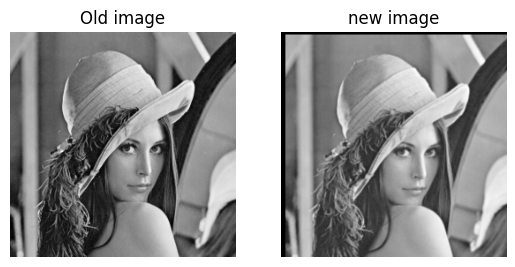

In [23]:
#plotting of translated lena im age
new_lena = translate(lena,3.75, 4.3)
plotter(lena, new_lena, "Old image","new image")






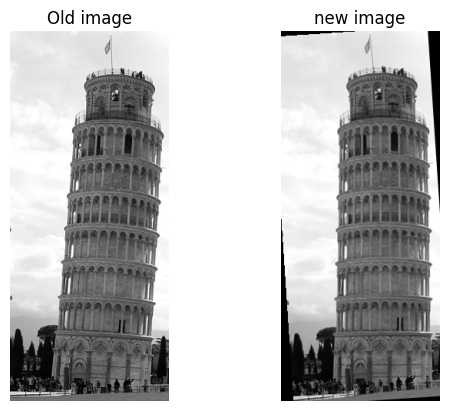

In [24]:
#plotting of rotated pisa image and angle is given in degree
new_pisa = rotate(pisa,-3.8)
plotter(pisa, new_pisa, "Old image","new image")

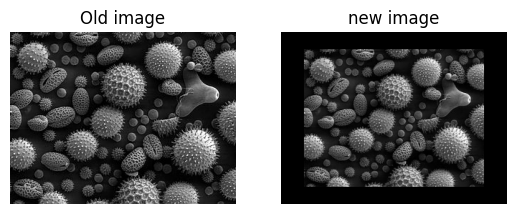

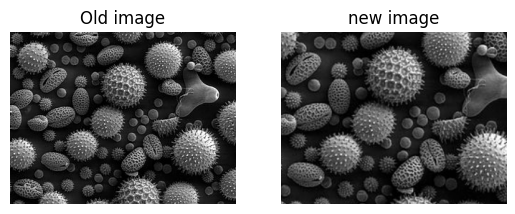

In [25]:
#plotting of zommed out image if sacale is less than 1 and so on.
new_cells = scale(cells, 0.8)
plotter(cells, new_cells, "Old image","new image")
new_cells = scale(cells, 1.3)
plotter(cells, new_cells, "Old image","new image")